# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | **converts categories into a separate binary (0/1) column** |
| **Feature selection*** | **restricting regressions to just the most important variables, selecting the most relevant features to build a model** |
| **Classifier** | **model that assigns inputs to categories (classes) instead of predicting numeric values** |
| **Precision** | **precision = true positives / (true positives + false positives)** |
| **Recall** | **recall = true positives / (true positives + false negatives)** |
| **F1 Score** | **f1 = 2((precision x recall)/(precision + recall))** |
| **Parsimonious model** | **model that is as simple as possible while still explaining the data** |
| **Ridge regression** | **an equation that forces coefficients towards zero to create a more stable model**  |
| **LASSO regression** | **an equation that forces coefficients to zero one at a time rather than just constraining the total coefficient sum to create a more interpretable model**  |
| **Cross validation** | **validating a model by splitting the data into train and test data sets** |
| **Tree based methods** | **models that use a branched structure to make decisions about independent variables which divides the data set into smaller chunks that may make predictions of the data easier to make** |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#####  A perfect classifier is a rectangle, a bad classifier looks like the line y=x
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
##### When the F1 score is close to 1, this indicates that the precision and recall of a model is high. Closer to 0 indicates that the precision and recall of a model is poor.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** |**straight line** | **s-shaped curve**  |
| **Dependent Variable Type** | **numeric, continuous** | **binary** |
| **Purpose** (regression or classification) | **regression** | **classification** |
| **Range of output variable** ($y_i$ or $p_i$) | **$y_i$** | **$p_i$** |
| **Method*** | **ordinary least squares** | **maximum likelihood estimation** |
| **Example of use** | **predicts a numeric values, like the amount someone's back pain has decreased after treatments in a trial** | **assigns input to categories or classes, like attempting to predict whether a penguin is a certain species or not** |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

##### Ideal models are able to perform well and accurately make predictions on never before seen data, and so by training and testing the model we're able to build the model based on a subset of data and then see how it performs on data it has not seen before to ensure the model is not overfit. We can do this by loading, cleaning, and scaling the data we have available, and then splitting the data into a test set and a training set. Next we will fit the model on the training data only and then run the model on the test data, plotting the predicted vs actual outcomes and creating a residual density plot. 

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

The outcome variable is continuous and we are looking to predict a numeric value, so linear regression is appropriate. 

In [16]:
housing <- read.csv("housing.csv")
library(dplyr)
library(tidyverse)

# Summary 
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [2]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_scaled <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
train <- runif(nrow(housing_scaled)) < 0.75
test <- !train

#### c) Fit the model.

In [3]:
f = median_house_value ~ longitude + latitude + housing_median_age +
  total_rooms + population + households + median_income

m <- lm(f, data=housing_scaled %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

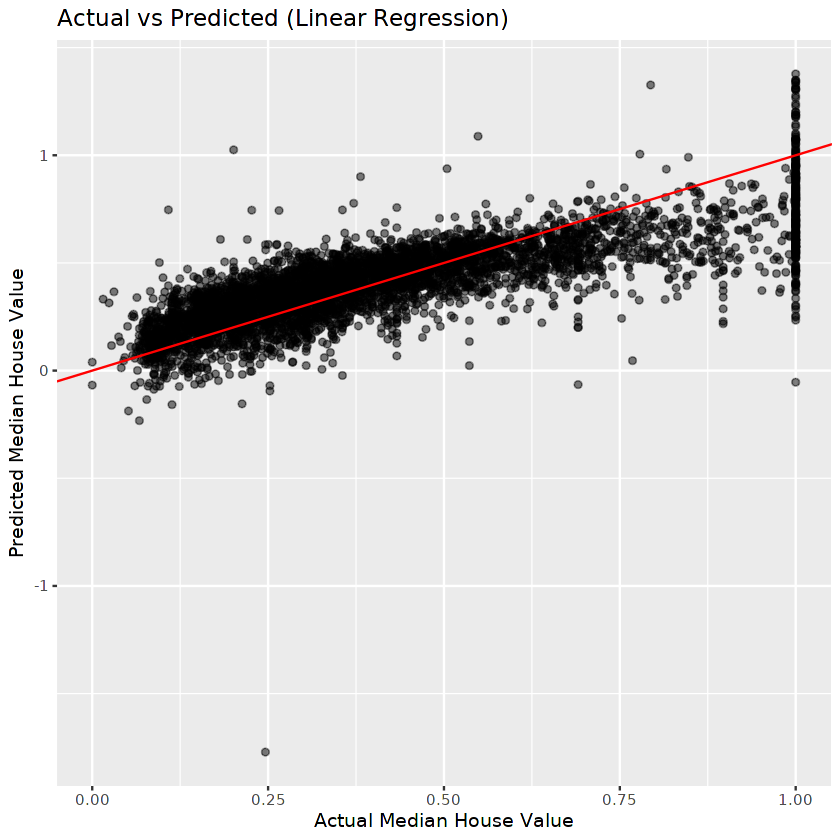

In [4]:
hs <- housing_scaled[test, ]

hs <- hs %>%
  mutate(median_house_value_pred = predict(m, newdata = hs))

ggplot(hs, aes(x = median_house_value, y = median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Actual vs Predicted (Linear Regression)",
       x = "Actual Median House Value",
       y = "Predicted Median House Value")

#### e) Make a residuals plot.

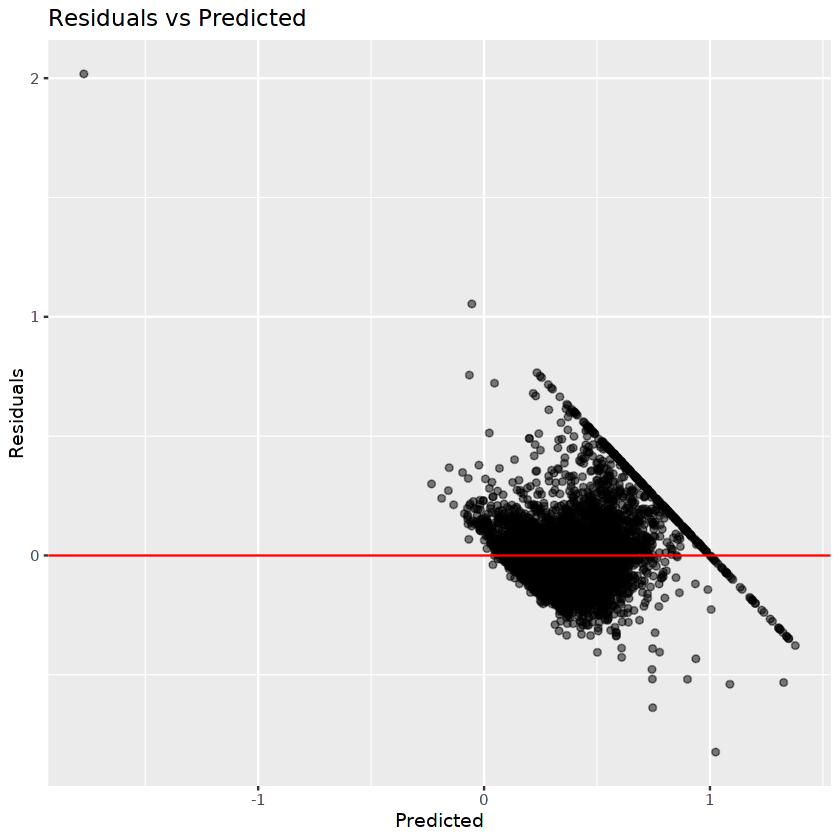

In [5]:
ggplot(hs, aes(x = median_house_value_pred, y = median_house_value - median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Residuals vs Predicted", x = "Predicted", y = "Residuals")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
The outcome variable is binary, so logistic regression is appropriate. 

In [10]:
install.packages("caret")
install.packages("glmnet")

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(glmnet))

# Load data
diabetes <- read_csv("diabetes.csv", show_col_types = FALSE)

# Summary 
summary(diabetes)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [11]:
# Scale
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

diabetes_scaled <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

# Train/test split
set.seed(123)
n <- nrow(diabetes_scaled)
train_idx <- sample.int(n, size = floor(0.1 * n))
d_train <- diabetes_scaled %>% slice(train_idx)
d_test  <- diabetes_scaled %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv")
d_test  %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [12]:
f <- Outcome ~ .
m <- glm(f, data = d_train, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fisher Sc

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [13]:
p <- predict(m, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?
The most important variables are pregnancies, glucose, and BMI. The accuracy increases with the LASSO model.

[1] 0.05480833

9 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)              -4.653919
Pregnancies               1.073443
Glucose                   3.455152
BloodPressure             .       
SkinThickness             .       
Insulin                   .       
BMI                       3.507260
DiabetesPedigreeFunction  .       
Age                       .       

measure,value
<chr>,<dbl>
True Positive,120.0000000
False Positive,31.0000000
True Negative,420.0000000
False Negative,121.0000000
Accuracy,0.7803468


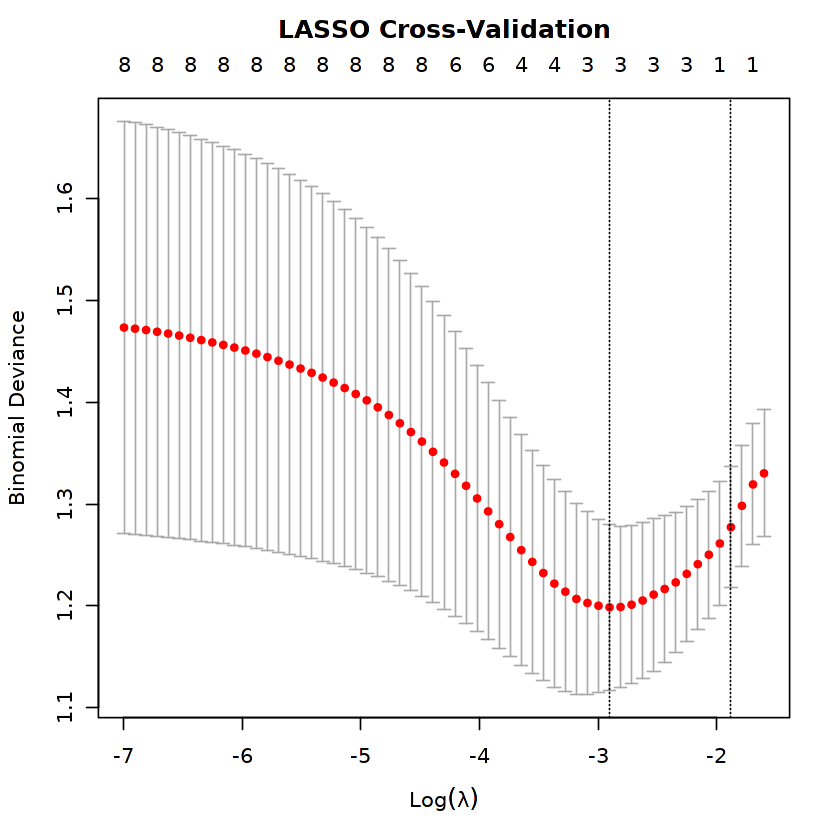

In [14]:
# Convert data frames to matrices for glmnet
X_train <- model.matrix(Outcome ~ ., d_train)[, -1]  # remove intercept
y_train <- d_train$Outcome
X_test  <- model.matrix(Outcome ~ ., d_test)[, -1]
y_test  <- d_test$Outcome

# Fit LASSO logistic regression (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(X_train, y_train, alpha = 1, family = "binomial")

# Plot cross-validation curve
plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

# Best lambda value
cv_lasso$lambda.min

# Coefficients at best lambda
coef(cv_lasso, s = "lambda.min")

# Predict on test data
lasso_pred_prob <- predict(cv_lasso, newx = X_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

# Performance metrics
tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


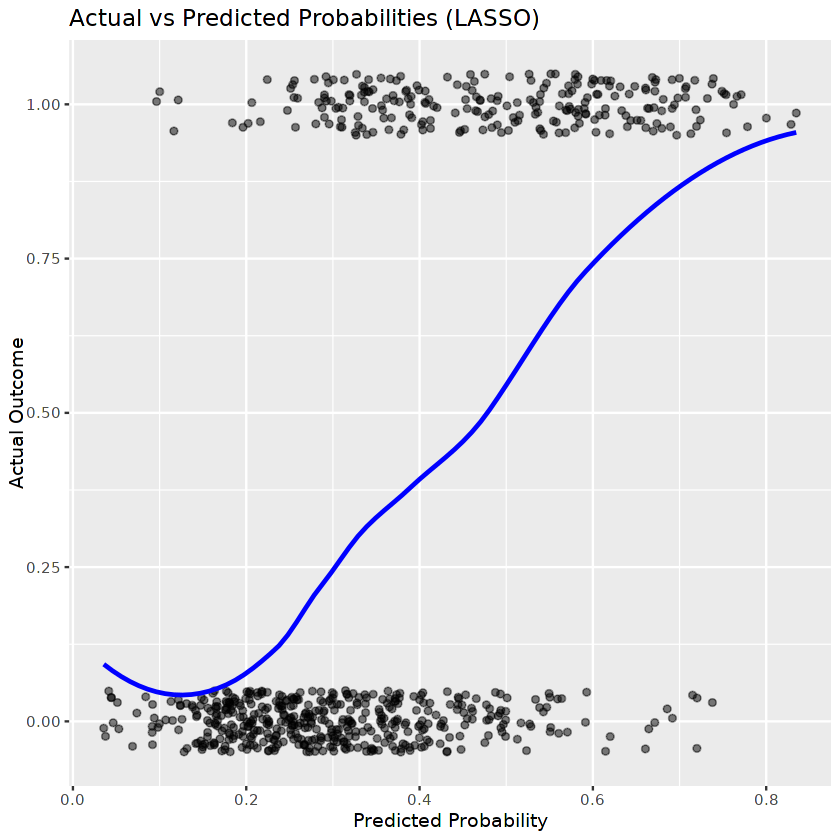

In [15]:
ggplot(data.frame(y_test, lasso_pred_prob),
       aes(x = lasso_pred_prob, y = y_test)) +
  geom_jitter(height = 0.05, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Actual vs Predicted Probabilities (LASSO)",
       x = "Predicted Probability", y = "Actual Outcome")